In [194]:

!pip install pandas
!pip install scikit-learn
!pip install matplot

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import jaccard_score, fowlkes_mallows_score, adjusted_rand_score
import warnings

In [196]:
warnings.simplefilter(action='ignore', category=FutureWarning)
# Função pureza por cluster
def cluster_purity(true_labels, cluster_labels):
    purezas = []
    for cluster_id in np.unique(cluster_labels):
        members = true_labels[cluster_labels == cluster_id]
        if len(members) > 0:
            most_common = members.value_counts().max() / len(members)
            purezas.append(most_common)
    return purezas, np.mean(purezas)

In [197]:
# Carregar o dataset binário
data = pd.read_csv('data_2.csv')
features = data.drop('label', axis=1)
true_labels = data['label']

print(data.head())

K_plot = list(range(2, 11))
results = {k: {} for k in K_plot}

   idade0_18  idade19_29  idade30_99  sexo_masc  sexo_fem  \
0        0.0         1.0         0.0        1.0       0.0   
1        0.0         1.0         0.0        1.0       0.0   
2        0.0         0.0         1.0        0.0       1.0   
3        0.0         0.0         1.0        0.0       1.0   
4        0.0         0.0         1.0        0.0       1.0   

   poder_aquisitivo0_2000  poder_aquisitivo2000_4000  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   
3                     0.0                        0.0   
4                     0.0                        0.0   

   poder_aquisitivo4000_8000  poder_aquisitivo_8000_inf  localizacao_perto  \
0                        1.0                        0.0                1.0   
1                        1.0                        0.0                0.0   
2                        1.0                        0.0       

In [198]:
for k in K_plot:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmlabels = kmeans.fit_predict(features)
    agg = AgglomerativeClustering(n_clusters=k)
    agglabels = agg.fit_predict(features)

    results[k]['km_rand'] = adjusted_rand_score(true_labels, kmlabels)
    results[k]['agg_rand'] = adjusted_rand_score(true_labels, agglabels)
    results[k]['km_jaccard'] = jaccard_score(true_labels, kmlabels, average='macro')
    results[k]['agg_jaccard'] = jaccard_score(true_labels, agglabels, average='macro')
    results[k]['km_fowlkes'] = fowlkes_mallows_score(true_labels, kmlabels)
    results[k]['agg_fowlkes'] = fowlkes_mallows_score(true_labels, agglabels)
    _, results[k]['km_pureza'] = cluster_purity(true_labels, kmlabels)
    _, results[k]['agg_pureza'] = cluster_purity(true_labels, agglabels)

results_df = pd.DataFrame({
    'k': K_plot,
    'km_rand': [results[k]['km_rand'] for k in K_plot],
    'agg_rand': [results[k]['agg_rand'] for k in K_plot],
    'km_jaccard': [results[k]['km_jaccard'] for k in K_plot],
    'agg_jaccard': [results[k]['agg_jaccard'] for k in K_plot],
    'km_fowlkes': [results[k]['km_fowlkes'] for k in K_plot],
    'agg_fowlkes': [results[k]['agg_fowlkes'] for k in K_plot],
    'km_pureza': [results[k]['km_pureza'] for k in K_plot],
    'agg_pureza': [results[k]['agg_pureza'] for k in K_plot],
})


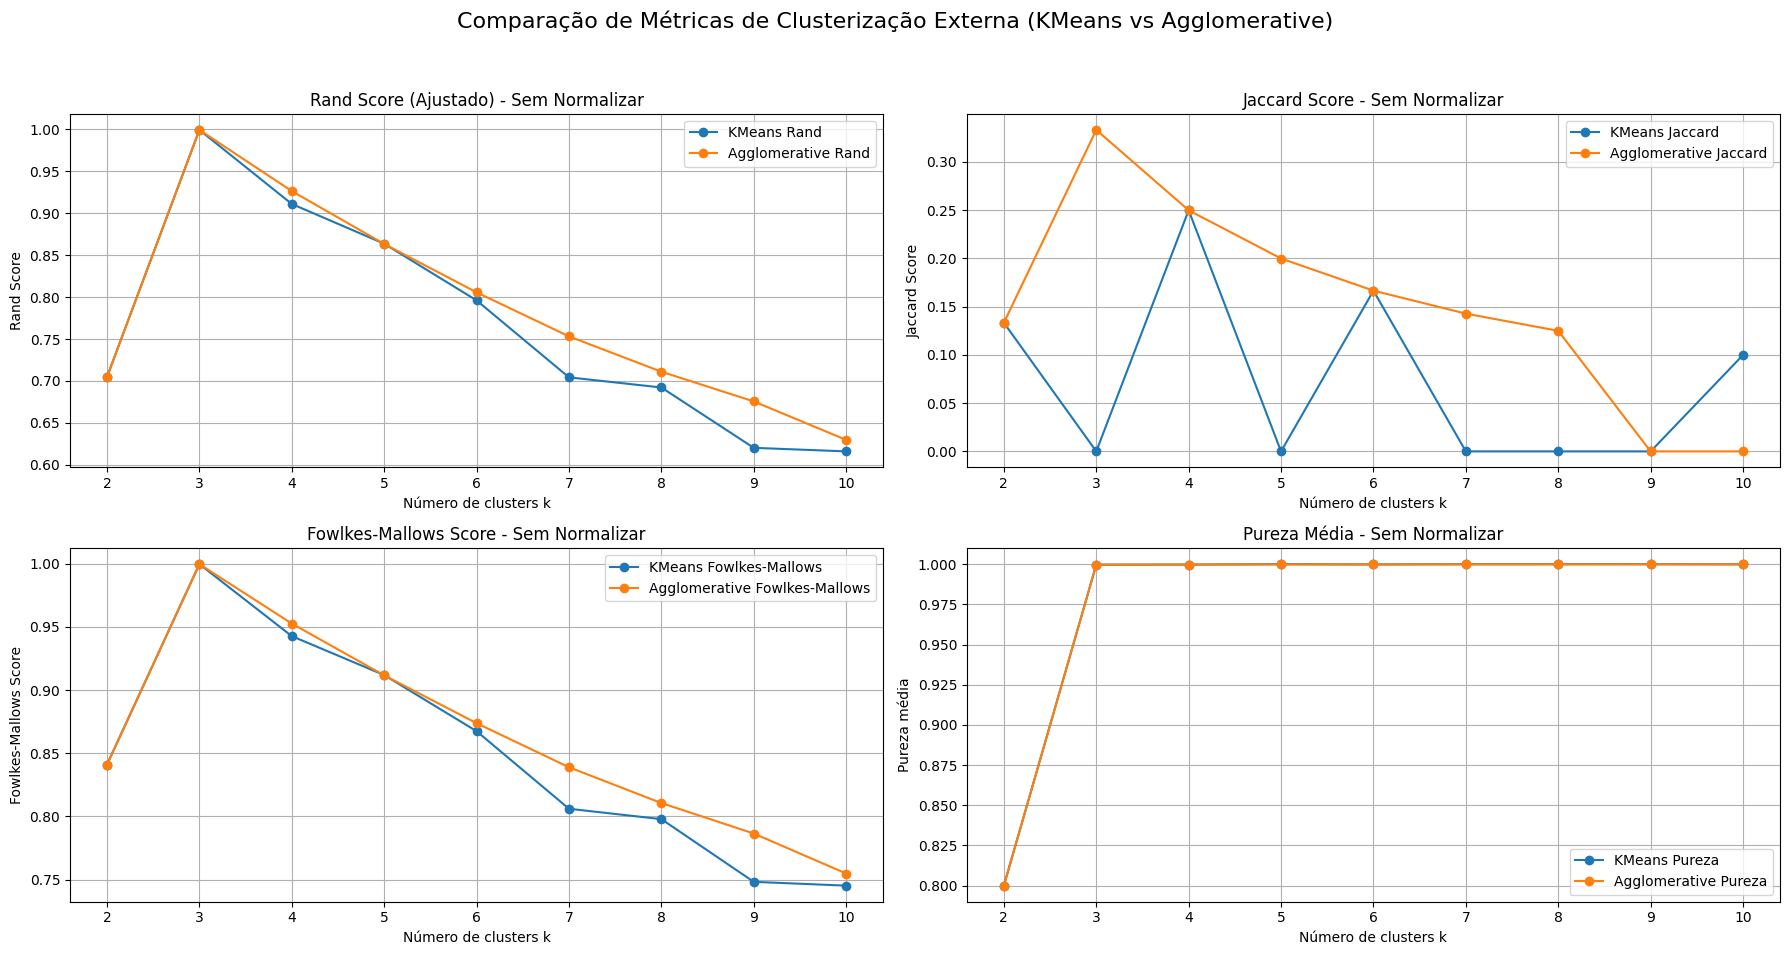

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Comparação de Métricas de Clusterização Externa (KMeans vs Agglomerative)', fontsize=16)

# Gráfico 1: Rand Score (Ajustado)
axes[0, 0].plot(results_df['k'], results_df['km_rand'], marker='o', label='KMeans Rand')
axes[0, 0].plot(results_df['k'], results_df['agg_rand'], marker='o', label='Agglomerative Rand')
axes[0, 0].set_title('Rand Score (Ajustado) - Sem Normalizar')
axes[0, 0].set_xlabel('Número de clusters k')
axes[0, 0].set_ylabel('Rand Score')
axes[0, 0].legend()
axes[0, 0].grid(True)
axes[0, 0].set_xticks(K_plot)

# Gráfico 2: Jaccard Score
axes[0, 1].plot(results_df['k'], results_df['km_jaccard'], marker='o', label='KMeans Jaccard')
axes[0, 1].plot(results_df['k'], results_df['agg_jaccard'], marker='o', label='Agglomerative Jaccard')
axes[0, 1].set_title('Jaccard Score - Sem Normalizar')
axes[0, 1].set_xlabel('Número de clusters k')
axes[0, 1].set_ylabel('Jaccard Score')
axes[0, 1].legend()
axes[0, 1].grid(True)
axes[0, 1].set_xticks(K_plot)

# Gráfico 3: Fowlkes-Mallows
axes[1, 0].plot(results_df['k'], results_df['km_fowlkes'], marker='o', label='KMeans Fowlkes-Mallows')
axes[1, 0].plot(results_df['k'], results_df['agg_fowlkes'], marker='o', label='Agglomerative Fowlkes-Mallows')
axes[1, 0].set_title('Fowlkes-Mallows Score - Sem Normalizar')
axes[1, 0].set_xlabel('Número de clusters k')
axes[1, 0].set_ylabel('Fowlkes-Mallows Score')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_xticks(K_plot)

# Gráfico 4: Pureza Média
axes[1, 1].plot(results_df['k'], results_df['km_pureza'], marker='o', label='KMeans Pureza')
axes[1, 1].plot(results_df['k'], results_df['agg_pureza'], marker='o', label='Agglomerative Pureza')
axes[1, 1].set_title('Pureza Média - Sem Normalizar')
axes[1, 1].set_xlabel('Número de clusters k')
axes[1, 1].set_ylabel('Pureza média')
axes[1, 1].legend()
axes[1, 1].grid(True)
axes[1, 1].set_xticks(K_plot)


# Ajusta o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Deixa espaço para o supertítulo
plt.show()
plt.savefig('Atividade2')
plt.close()


In [200]:
# Encontrar melhor k pelo Rand para cada método
idx_best_k_agg = results_df['agg_rand'].idxmax()
best_k_agg = results_df['k'][idx_best_k_agg]
idx_best_k_km = results_df['km_rand'].idxmax()
best_k_km = results_df['k'][idx_best_k_km]

# Clusterização final para melhor k
agg = AgglomerativeClustering(n_clusters=best_k_agg)
agglabels = agg.fit_predict(features)
kmeans = KMeans(n_clusters=best_k_km, random_state=42, n_init=10)
kmlabels = kmeans.fit_predict(features)


In [201]:
print('\n****Respostas para os melhores k usando dados sem normalizar****')
print(f"\nQuestão 1: Quantidade de clusters\nAgglomerative: {best_k_agg}\nKMeans: {best_k_km}")

print('\nQuestão 2: Pontos por cluster')
print('Agglomerative:')
print(pd.Series(agglabels).value_counts().sort_index())
print('KMeans:')
print(pd.Series(kmlabels).value_counts().sort_index())








****Respostas para os melhores k usando dados sem normalizar****

Questão 1: Quantidade de clusters
Agglomerative: 3
KMeans: 3

Questão 2: Pontos por cluster
Agglomerative:
0    2000
1    1499
2    1001
Name: count, dtype: int64
KMeans:
0    1499
1    2000
2    1001
Name: count, dtype: int64


In [202]:
print('\nQuestão 3: Pureza dos clusters')
purezas_agg, mean_agg = cluster_purity(true_labels, agglabels)
for i, p in enumerate(purezas_agg):
    print(f'Agglomerative - Cluster {i}: Pureza = {p:.3f}')
print(f'Pureza média Agglomerative: {mean_agg:.3f}')

purezas_km, mean_km = cluster_purity(true_labels, kmlabels)
for i, p in enumerate(purezas_km):
    print(f'KMeans - Cluster {i}: Pureza = {p:.3f}')
print(f'Pureza média KMeans: {mean_km:.3f}')




Questão 3: Pureza dos clusters
Agglomerative - Cluster 0: Pureza = 1.000
Agglomerative - Cluster 1: Pureza = 1.000
Agglomerative - Cluster 2: Pureza = 0.999
Pureza média Agglomerative: 1.000
KMeans - Cluster 0: Pureza = 1.000
KMeans - Cluster 1: Pureza = 1.000
KMeans - Cluster 2: Pureza = 0.999
Pureza média KMeans: 1.000


In [203]:
print('\nQuestão 4: Coeficiente de Jaccard')
print(f'Agglomerative: {jaccard_score(true_labels, agglabels, average="macro"):.3f}')
print(f'KMeans: {jaccard_score(true_labels, kmlabels, average="macro"):.3f}')

print('\nQuestão 5: Coeficiente de Rand Ajustado')
print(f'Agglomerative: {adjusted_rand_score(true_labels, agglabels):.3f}')
print(f'KMeans: {adjusted_rand_score(true_labels, kmlabels):.3f}')

print('\nQuestão 6: Coeficiente de Fowlkes-Mallows')
print(f'Agglomerative: {fowlkes_mallows_score(true_labels, agglabels):.3f}')
print(f'KMeans: {fowlkes_mallows_score(true_labels, kmlabels):.3f}')




Questão 4: Coeficiente de Jaccard
Agglomerative: 0.333
KMeans: 0.000

Questão 5: Coeficiente de Rand Ajustado
Agglomerative: 0.999
KMeans: 0.999

Questão 6: Coeficiente de Fowlkes-Mallows
Agglomerative: 1.000
KMeans: 1.000


In [204]:
# Definindo o k de interesse (exemplo: k=3 ou o melhor k pelo Rand)
k_interesse = 3  # ou best_k_agg, best_k_km conforme análise anterior
linha_k = results_df[results_df['k'] == k_interesse]

# Extrai valores individuais para cada métrica
km_rand = float(linha_k['km_rand'])
agg_rand = float(linha_k['agg_rand'])
km_jaccard = float(linha_k['km_jaccard'])
agg_jaccard = float(linha_k['agg_jaccard'])
km_fowlkes = float(linha_k['km_fowlkes'])
agg_fowlkes = float(linha_k['agg_fowlkes'])
km_pureza = float(linha_k['km_pureza'])
agg_pureza = float(linha_k['agg_pureza'])

print('\nQuestão 7: Há diferença na performance dessas métricas ao utilizar KMeans ou AgglomerativeClustering?')
print('\nPara k = {}:'.format(k_interesse))
print(f'Rand Ajustado - KMeans: {km_rand:.3f}, Agglomerative: {agg_rand:.3f}, Diferença: {abs(km_rand - agg_rand):.3f}')
print(f'Jaccard        - KMeans: {km_jaccard:.3f}, Agglomerative: {agg_jaccard:.3f}, Diferença: {abs(km_jaccard - agg_jaccard):.3f}')
print(f'Fowlkes-Mallows- KMeans: {km_fowlkes:.3f}, Agglomerative: {agg_fowlkes:.3f}, Diferença: {abs(km_fowlkes - agg_fowlkes):.3f}')
print(f'Pureza Média   - KMeans: {km_pureza:.3f}, Agglomerative: {agg_pureza:.3f}, Diferença: {abs(km_pureza - agg_pureza):.3f}')

# Comentário interpretativo
if (abs(km_rand - agg_rand) < 0.05
    and abs(km_jaccard - agg_jaccard) < 0.05
    and abs(km_fowlkes - agg_fowlkes) < 0.05
    and abs(km_pureza - agg_pureza) < 0.05):
    print('\nOs resultados mostram que NÃO há diferença significativa nas métricas para esse valor de k.')
else:
    print('\nOs resultados mostram que EXISTEM diferenças perceptíveis em algumas métricas entre os algoritmos.')



Questão 7: Há diferença na performance dessas métricas ao utilizar KMeans ou AgglomerativeClustering?

Para k = 3:
Rand Ajustado - KMeans: 0.999, Agglomerative: 0.999, Diferença: 0.000
Jaccard        - KMeans: 0.000, Agglomerative: 0.333, Diferença: 0.333
Fowlkes-Mallows- KMeans: 1.000, Agglomerative: 1.000, Diferença: 0.000
Pureza Média   - KMeans: 1.000, Agglomerative: 1.000, Diferença: 0.000

Os resultados mostram que EXISTEM diferenças perceptíveis em algumas métricas entre os algoritmos.


In [205]:
# Questão 8 - Análise das características de cada grupo (para melhor k pelo rand)
print('\nQuestão 8: Características dos grupos - Agglomerative')
group_means_agg = features.groupby(agglabels).mean()
print(group_means_agg)

print('\nQuestão 8: Características dos grupos - KMeans')
group_means_km = features.groupby(kmlabels).mean()
print(group_means_km)




Questão 8: Características dos grupos - Agglomerative
   idade0_18  idade19_29  idade30_99  sexo_masc  sexo_fem  \
0        0.0    0.000000      0.8925   0.000000  0.893000   
1        0.0    0.899933      0.0000   0.905937  0.000000   
2        0.0    0.892108      0.0000   0.000000  0.879121   

   poder_aquisitivo0_2000  poder_aquisitivo2000_4000  \
0                     0.0                        0.0   
1                     0.0                        0.0   
2                     0.0                        0.0   

   poder_aquisitivo4000_8000  poder_aquisitivo_8000_inf  localizacao_perto  \
0                   0.887000                   0.000000           0.894000   
1                   0.896598                   0.000000           0.901268   
2                   0.000000                   0.888112           0.000000   

   localizacao_longe  tem_filhos  nao_tem_filhos  solteiro  casado  
0           0.000000    0.000000          0.9015  0.000000   0.904  
1           0.000000    

In [206]:
print("\n" + "="*60)
print("**** Conclusão da Questão 8: Perfis dos Clusters (k=3) ****")
print("="*60)

print("\nOs perfis identificados são:")

print("\n--- Perfil 1 (Agglo Cluster 1 / KMeans Cluster 0) ---")
print("\t- Perfil: Homens Jovens (19-29), Solteiros, Com Filhos.")
print("\t- Renda:  Média-Alta (4-8k)")
print("\t- Local:  Perto")

print("\n--- Perfil 2 (Agglo Cluster 0 / KMeans Cluster 1) ---")
print("\t- Perfil: Mulheres Maduras (30+), Casadas, Sem Filhos.")
print("\t- Renda:  Média-Alta (4-8k)")
print("\t- Local:  Perto")

print("\n--- Perfil 3 (Agglo Cluster 2 / KMeans Cluster 2) ---")
print("\t- Perfil: Mulheres Jovens (19-29), Solteiras, Com Filhos.")
print("\t- Renda:  Alta (8k+)")
print("\t- Local:  Longe")
print("="*60)


**** Conclusão da Questão 8: Perfis dos Clusters (k=3) ****

Os perfis identificados são:

--- Perfil 1 (Agglo Cluster 1 / KMeans Cluster 0) ---
	- Perfil: Homens Jovens (19-29), Solteiros, Com Filhos.
	- Renda:  Média-Alta (4-8k)
	- Local:  Perto

--- Perfil 2 (Agglo Cluster 0 / KMeans Cluster 1) ---
	- Perfil: Mulheres Maduras (30+), Casadas, Sem Filhos.
	- Renda:  Média-Alta (4-8k)
	- Local:  Perto

--- Perfil 3 (Agglo Cluster 2 / KMeans Cluster 2) ---
	- Perfil: Mulheres Jovens (19-29), Solteiras, Com Filhos.
	- Renda:  Alta (8k+)
	- Local:  Longe
